#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans   #clustering algorithm
from scipy.spatial import distance    #to calculate distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox  #to display small images in plot

In [5]:
## Reading the image plaksha_Faculty.jpg
img=cv.imread("C:\\Users\\moksh\\Desktop\\SEMESTER 4\\MLPR\\LAB 5\\Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv.CascadeClassifier(
    cv.data.haarcascades + 'haarcascade_frontalface_default.xml'   # Load the Haar cascade for frontal face detection
)

  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

num_faces= len(faces_rect)  ## Total number of faces detected
# Define the text and font parameters
text = f"Total number of faces detected are {num_faces}"  ## The text you want to write
font = cv.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv.putText(img, text, (10, 30), font, font_scale, font_color, font_thickness)
    
# Display the image and window title should be "Total number of face detected are #"  
cv.imshow("Total number of faces detected are " + str(len(faces_rect)), img)
cv.waitKey(0)
cv.destroyAllWindows()


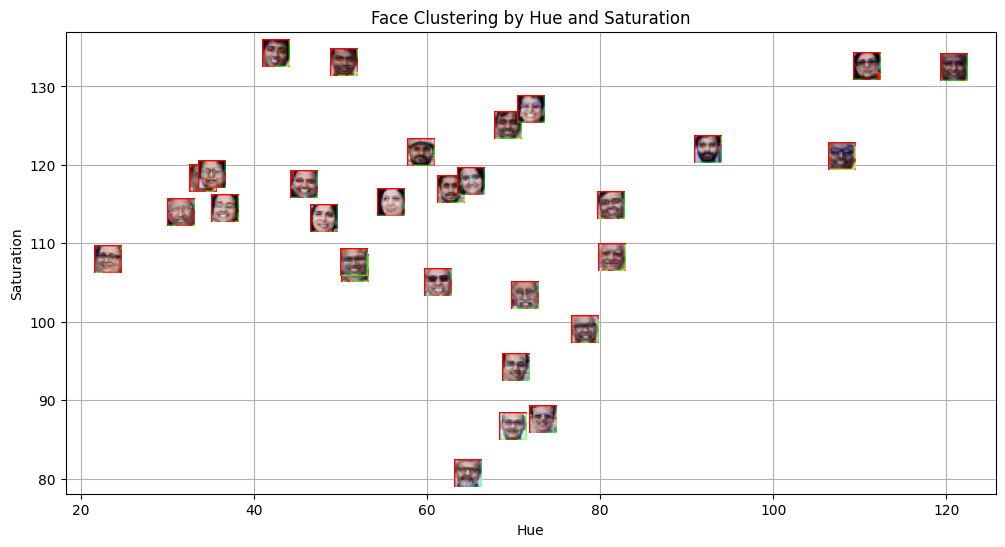

In [6]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv.cvtColor(cv.resize(face_images[i], (20, 20)), cv.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering by Hue and Saturation")
plt.grid(True)
plt.show()

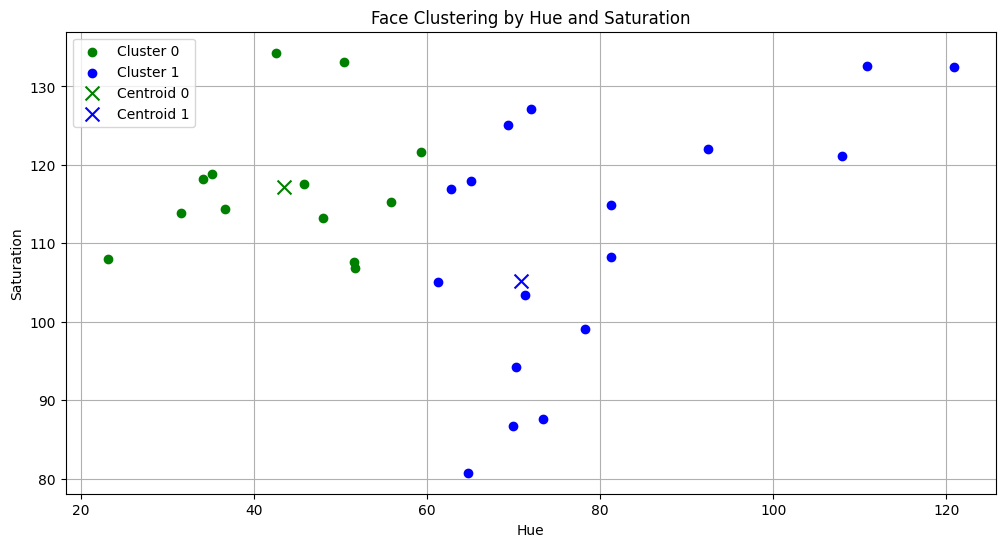

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='x', s=100, label='Centroid 1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering by Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()


In [10]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv.imread("C:\\Users\\moksh\\Desktop\\SEMESTER 4\\MLPR\\LAB 5\\Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
gray_img1=cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_img1, 1.05, 4, minSize=(25,25))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv.imshow("Template Image with Detected Faces", template_img)
cv.waitKey(0) 
cv.destroyAllWindows()    


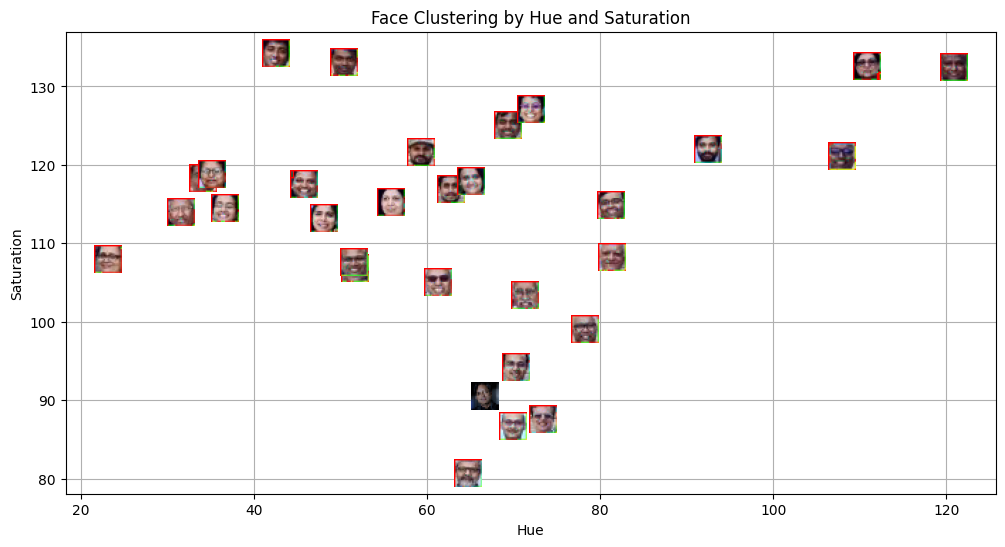

In [11]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv.cvtColor(template_img, cv.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv.cvtColor(cv.resize(face_images[i], (20, 20)), cv.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv.cvtColor(cv.resize(template_img, (20, 20)), cv.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering by Hue and Saturation")
## Add grid
plt.grid(True)
## show plot
plt.show()

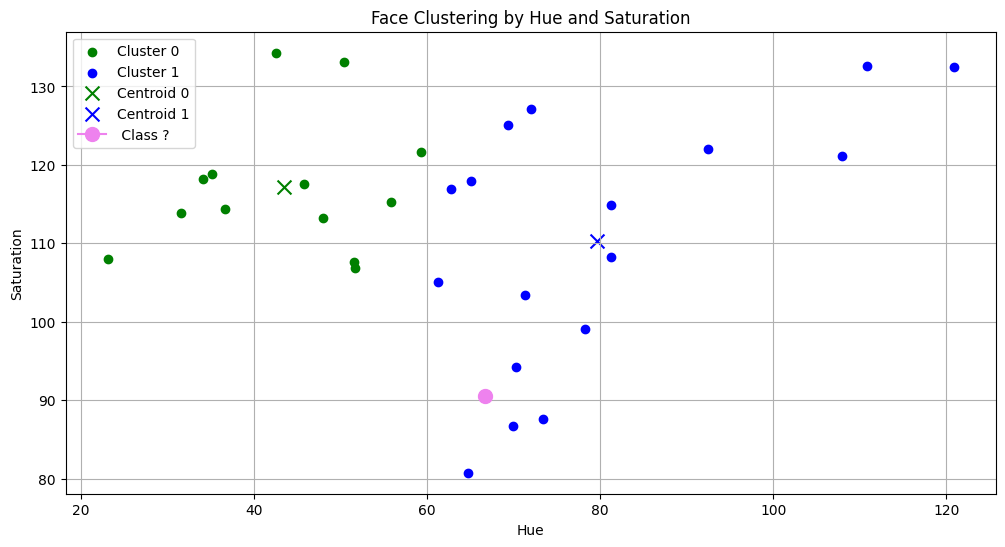

In [12]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='x', s=100, label='Centroid 1')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering by Hue and Saturation")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


# 1. What are the common distance metrics used in distance-based classification algorithms?

Common distance metrics includes Euclidean Distance, Manhattan Distance, Minkowski Distance, Mahalanobis Distance, Cosine Distance, and Hamming Distance. The selection of a distance metric depends on the nature of the dataset, the number of dimensions, and whether relationships between features (correlation) need to be taken into account.




_________________________

# 2. What are some real-world applications of distance-based classification algorithms?

Distance-based classification algorithms such as K-Nearest Neighbors (KNN) are widely used in applications where similarity between data points determines classification. Some common real-world applications include:

#### 1. Image Recognition
Used in face recognition, object detection, and handwritten digit classification.  
Images are classified based on similarity between pixel values or extracted feature vectors.

#### 2. Text Classification
Applied in spam filtering, sentiment analysis, and document categorization.  
Cosine similarity or other distance measures are used to compare high-dimensional text feature vectors.

#### 3. Medical Diagnosis
Used to classify patients based on symptoms, laboratory results, or medical imaging data.  
A new patient is assigned to a disease category based on similarity to previous cases.

#### 4. Recommendation Systems
Used to recommend products, movies, or content by identifying users with similar preferences.

#### 5. Pattern Recognition
Applied in speech recognition, handwriting recognition, and biometric systems where classification depends on similarity between feature patterns.

Distance-based methods are especially useful when decision boundaries are complex and classification depends on local neighborhood structure.

_________________________

# 3. Explain various distance metrics.

Distance-based classification algorithms such as K-Nearest Neighbors (KNN) classify a data point based on its proximity to other points in the feature space. The choice of distance metric significantly influences classification performance. The commonly used distance metrics are:

#### 1. Euclidean Distance (L2 Norm)
Measures the straight-line distance between two points in the feature space.  
It is defined as:

d(x, y) = √Σ (xi − yi)²  

It is the most commonly used distance metric for continuous numerical data.

#### 2. Manhattan Distance (L1 Norm)
Also known as City Block distance. It measures the sum of absolute differences between feature values.

d(x, y) = Σ |xi − yi|  

It is less sensitive to outliers compared to Euclidean distance and performs better in high-dimensional spaces.

#### 3. Minkowski Distance
A generalized form of Lp distance.

d(x, y) = (Σ |xi − yi|^p)^(1/p)

- When p = 1 → Manhattan Distance  
- When p = 2 → Euclidean Distance  
- When p → ∞ → Chebyshev Distance  

It provides flexibility in choosing different distance behaviors.

#### 4. Mahalanobis Distance
Measures distance by considering the covariance structure of the data.

d(x, y) = √((x − y)ᵀ S⁻¹ (x − y))

where S is the covariance matrix.

It accounts for feature correlation and scale, making it more robust when features are correlated.

#### 5. Cosine Distance
Measures the angle between two vectors instead of magnitude.

Cosine Similarity = (x · y) / (||x|| ||y||)

Cosine Distance = 1 − Cosine Similarity

It is widely used in text classification and high-dimensional sparse data.

#### 6. Hamming Distance
Counts the number of differing positions between two binary or categorical vectors.

It is mainly used for discrete or binary data.

_________________________

# 4. What is the role of cross validation in model performance?

Cross-validation is a resampling technique used to evaluate the generalization ability of a model.

- The dataset is divided into k equal subsets (folds).
- The model is trained on (k − 1) folds and tested on the remaining fold.
- This process is repeated k times so that each fold is used once for testing.
- The final performance is computed as the average across all folds.

Role in model performance:

- Provides a better estimate of generalization error.
- Reduces dependence on a single train-test split.
- Helps in selecting optimal hyperparameters (e.g., choosing k in KNN).
- Assists in detecting overfitting.
- Improves reliability and robustness of model evaluation.


_________________________

## 5. Explain variance and bias in terms of KNN?

In K-Nearest Neighbors (KNN), bias and variance are controlled by the value of k.

- When k is small:
  - The model is highly flexible, Bias is low (fits training data closely).
  - Variance is high (sensitive to noise), May lead to overfitting.

- When k is large:
  - The model becomes smoother, Bias is high (oversimplifies decision boundary).
  - Variance is low (less sensitive to noise), May lead to underfitting.

Thus, KNN demonstrates a clear bias-variance tradeoff, and selecting an appropriate value of k is important for balancing model complexity and generalization performance.
